<a href="https://colab.research.google.com/github/Joao-Victor-AVM/EnergyGlobalDataAnalysis/blob/main/EnergyGlobalData4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Energy Global Data**##

O intuito desse dataset é analisar os dados de 2000 a 2020 de distribuição dos diversos tipos de energia por vários países pelo mundo com foco no Brasil.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy import stats
from scipy.stats import shapiro
from numpy import mean
from statsmodels.graphics.gofplots import qqplot
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics.pairwise import check_pairwise_arrays
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted


from google.colab import drive

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
energia = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/global-data-on-sustainable-energy (1).csv')

In [ ]:
energia.drop(["Financial flows to developing countries (US $)", "Energy intensity level of primary energy (MJ/$2017 PPP GDP)", "Value_co2_emissions_kt_by_country", "Density\\n(P/Km2)", "Land Area(Km2)", "Latitude", "Longitude", "gdp_growth"], axis=1, inplace = True)

In [ ]:
energia.rename(columns={"Access to electricity (% of population)" : "AcessElet"}, inplace = True)
energia.rename(columns={"Access to clean fuels for cooking" : "AcessCleanFuelCok"}, inplace = True)
energia.rename(columns={"Renewable-electricity-generating-capacity-per-capita" : "GeraCapReutElet"}, inplace = True)
energia.rename(columns={"Renewable energy share in the total final energy consumption (%)" : "PartReutFinalCom"}, inplace = True)
energia.rename(columns={"Electricity from fossil fuels (TWh)" : "EletFossil"}, inplace = True)
energia.rename(columns={"Electricity from nuclear (TWh)" : "EletNuclear"}, inplace = True)
energia.rename(columns={"Electricity from renewables (TWh)" : "EletReut"}, inplace = True)
energia.rename(columns={"Low-carbon electricity (% electricity)" : "EletLowCarbo"}, inplace = True)
energia.rename(columns={"Primary energy consumption per capita (kWh/person)" : "PrimaryEnergyCom"}, inplace = True)
energia.rename(columns={"Renewables (% equivalent primary energy)" : "ReutPrimayEnergy"}, inplace = True)

In [ ]:
energia

,Entity,Year,AcessElet,AcessCleanFuelCok,GeraCapReutElet,PartReutFinalCom,EletFossil,EletNuclear,EletReut,EletLowCarbo,PrimaryEnergyCom,ReutPrimayEnergy,gdp_per_capita
0,Afghanistan,2000,1.613591,6.2,9.22,44.99,0.16,0.0,0.31,65.957440,302.59482,NaN,NaN
1,Afghanistan,2001,4.074574,7.2,8.86,45.60,0.09,0.0,0.50,84.745766,236.89185,NaN,NaN
2,Afghanistan,2002,9.409158,8.2,8.47,37.83,0.13,0.0,0.56,81.159424,210.86215,NaN,179.426579
3,Afghanistan,2003,14.738506,9.5,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,NaN,190.683814
4,Afghanistan,2004,20.064968,10.9,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,NaN,211.382074
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,81.90,3.50,0.0,3.32,48.680350,3227.68020,NaN,1464.588957
3645,Zimbabwe,2017,44.178635,29.8,62.33,82.46,3.05,0.0,4.30,58.503407,3068.01150,NaN,1235.189032
3646,Zimbabwe,2018,45.572647,29.9,82.53,80.23,3.73,0.0,5.46,59.412407,3441.98580,NaN,1254.642265
3647,Zimbabwe,2019,46.781475,30.1,81.40,81.50,3.66,0.0,4.58,55.582527,3003.65530,NaN,1316.740657


#**Analise**#

In [ ]:
Brazil = energia[(energia["Entity"] == "Brazil")]
China = energia[(energia["Entity"] == "China")]
India = energia[(energia["Entity"] == "India")]

#**Análise Acesso a Energia**#

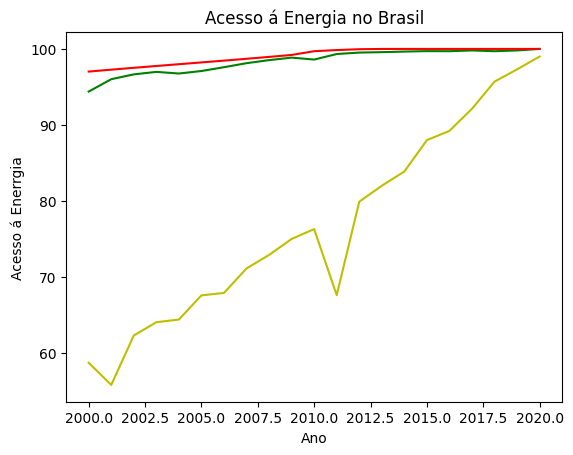

In [ ]:
plt.xlabel("Ano")
plt.ylabel("Acesso á Enerrgia")
plt.title("Acesso á Energia no Brasil")
plt.plot(Brazil["Year"], Brazil["AcessElet"], "g-")
plt.plot(China["Year"], China["AcessElet"], "r-")
plt.plot(India["Year"], India["AcessElet"], "y-")
plt.show()

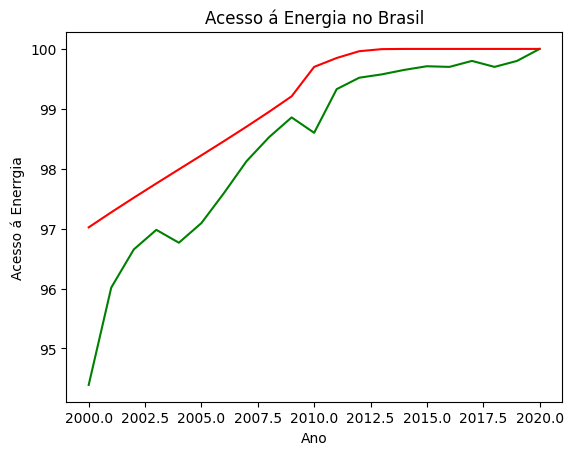

In [ ]:
plt.xlabel("Ano")
plt.ylabel("Acesso á Enerrgia")
plt.title("Acesso á Energia no Brasil")
plt.plot(Brazil["Year"], Brazil["AcessElet"], "g-")
plt.plot(China["Year"], China["AcessElet"], "r-")
plt.show()

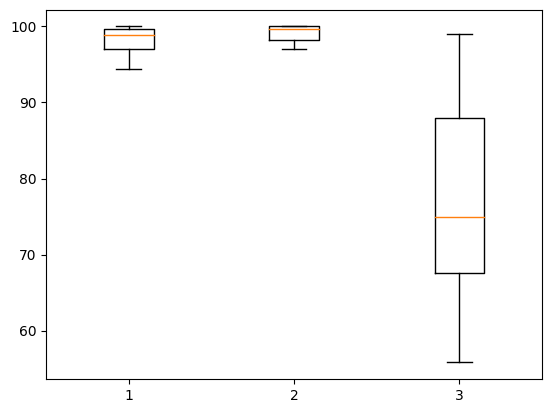

In [ ]:
energiaAcess = [Brazil["AcessElet"], China["AcessElet"], India["AcessElet"]]
fig, ax = plt.subplots()
ax.boxplot(energiaAcess)
plt.show()

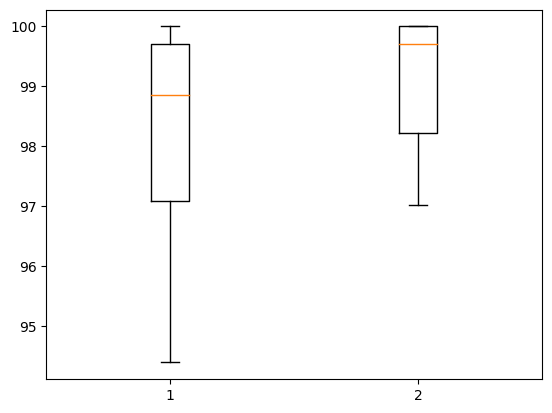

In [ ]:
energiaAcess = [Brazil["AcessElet"], China["AcessElet"]]
fig, ax = plt.subplots()
ax.boxplot(energiaAcess)
plt.show()

**Brasil**

O gráfico mostra uma crecente no começo do milênio e uma certa baixa, aumentando nos ultimos anos. Isso muito provávelmente acontece por conta das campanhas de melhoria de acesso a energia para comunidades indigénas, quilombolas e meio rural como um todo, evoluindo para ajudar comunidades que se localizavam em áreas de dificil acesso para os principais meio de energia. Hoje, esses esforços estão focados em levar energia para Amazônia Legal. Assim, a oscilação do gráfico se confirma, demonstrando que a queda nos anos 10 se dá pela falta de campanhas solidas de energização.

**China**

A China apresenta um crescente constante que só começa a desacelerar por volta de 2008 e no início dos anos 10. Desde de 1978, a China investiu e consumiu diversas matrizes energéticas só diminuindo seu consumo nos últimos anos. Isso muito provávelmente se deve pelo país estar de fato alcançando as áreas que antes não haviam energia, e preenchendo os poucos locais ainda necessitados dela.

**India**

India é terceiro grande consumidro de energia, porém só nos ultimos anos tem alcançado Brasil e China. Sua ideia de crescimento se assemelha a China, porém com uma base diferente e, muito provávelmente, um investimento diferente.

#**Análise Eneregia Reutilizavel**#

**Brasil**

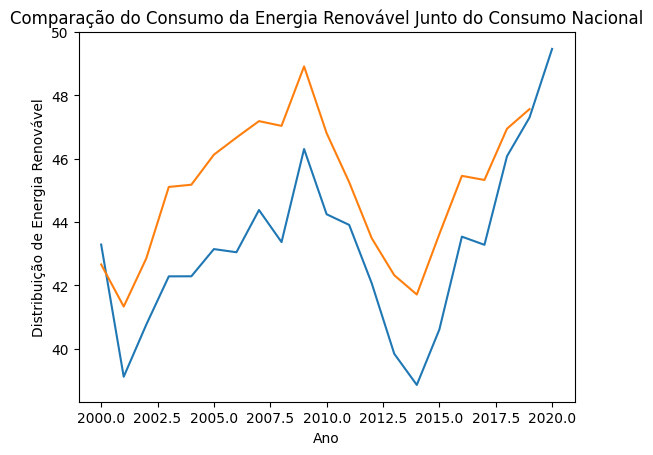

In [ ]:
plt.xlabel("Ano")
plt.ylabel("Distribuição de Energia Renovável")
plt.title("Comparação do Consumo da Energia Renovável Junto do Consumo Nacional")
plt.plot(Brazil["Year"], Brazil["ReutPrimayEnergy"])
plt.plot(Brazil["Year"], Brazil["PartReutFinalCom"])
plt.show()

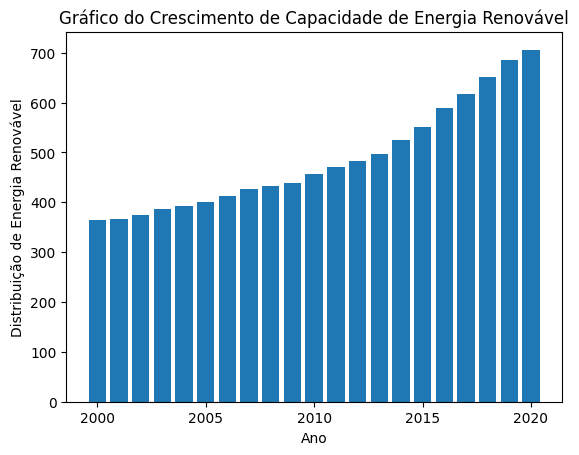

In [ ]:
plt.xlabel("Ano")
plt.ylabel("Distribuição de Energia Renovável")
plt.title("Gráfico do Crescimento de Capacidade de Energia Renovável")
plt.bar(Brazil["Year"], Brazil["GeraCapReutElet"])
plt.show()

Como se pode notar, há uma crescente no começo do milênio e uma queda nos anos 10, isso provávelmente se deve pelo fato da construção de uma grande usina de energia renovável, que, ao ser concluída, volta a subir. É bom ficar claro, que a Geração de energia estava sempre subindo, demonstrando que o país tem uma crescente capacidade de gerar e criar energia renovável.

**China**

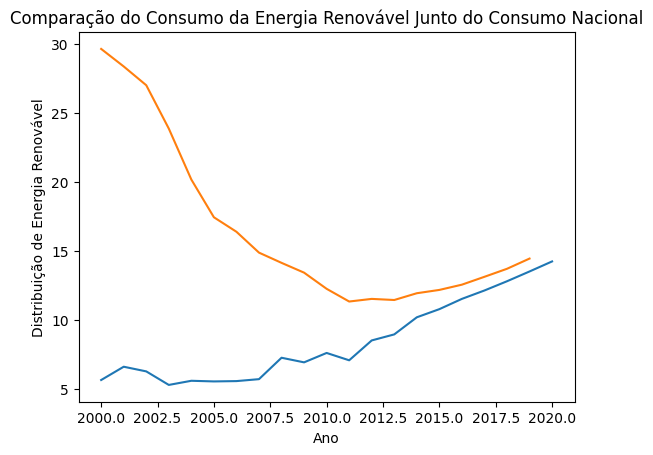

In [ ]:
plt.xlabel("Ano")
plt.ylabel("Distribuição de Energia Renovável")
plt.title("Comparação do Consumo da Energia Renovável Junto do Consumo Nacional")
plt.plot(China["Year"], China["ReutPrimayEnergy"])
plt.plot(China["Year"], China["PartReutFinalCom"])
plt.show()

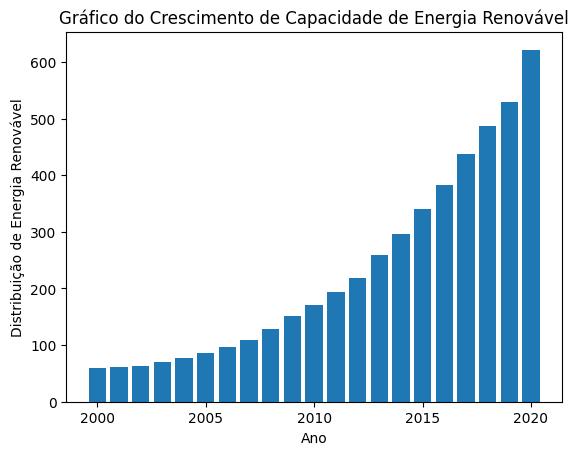

In [ ]:
plt.xlabel("Ano")
plt.ylabel("Distribuição de Energia Renovável")
plt.title("Gráfico do Crescimento de Capacidade de Energia Renovável")
plt.bar(China["Year"], China["GeraCapReutElet"])
plt.show()

No caso da China, parece que conforme diminuem a quantidade de energia renovável, mais utilizamo  que lhe resta dela. Contudo, o gráfico de barras indica que há uma crescente na capacidade de energia do país, isso se debe porque a China, prefere utilizar suas empresas para investir em usinas éolicas nos exterior diminuindo a necessidade dessas no seus país e, como visto nos gráficos, diminuindo gradativamente sua produção.

**India**

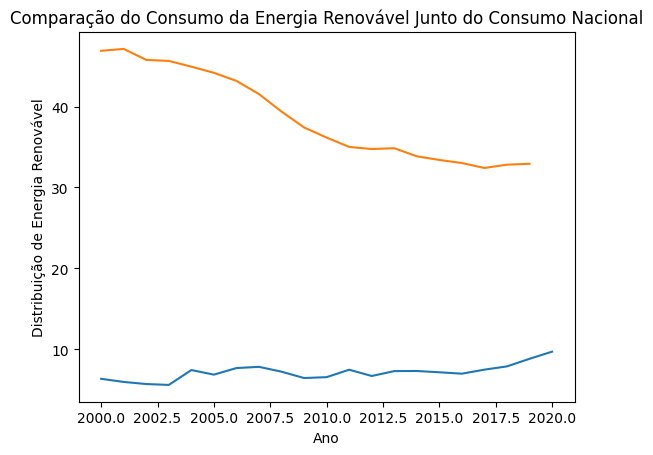

In [ ]:
plt.xlabel("Ano")
plt.ylabel("Distribuição de Energia Renovável")
plt.title("Comparação do Consumo da Energia Renovável Junto do Consumo Nacional")
plt.plot(India["Year"], India["ReutPrimayEnergy"])
plt.plot(India["Year"], India["PartReutFinalCom"])
plt.show()

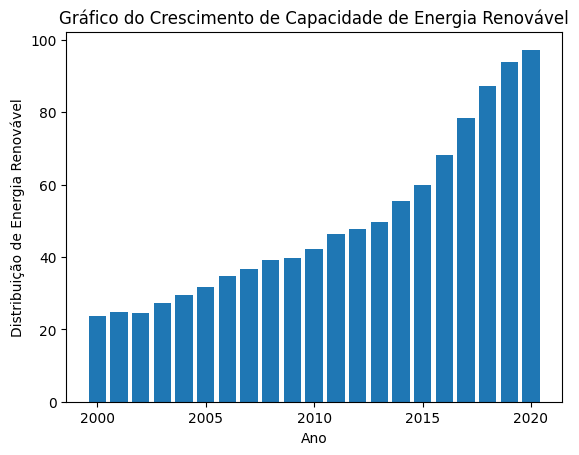

In [ ]:
plt.xlabel("Ano")
plt.ylabel("Distribuição de Energia Renovável")
plt.title("Gráfico do Crescimento de Capacidade de Energia Renovável")
plt.bar(India["Year"], India["GeraCapReutElet"])
plt.show()

A India aparenta ter uma estabilidade no uso de energis renováveis, nem aumentando e aapenas diminuindo nos ultimos anos. Assim como os demais gráficos de barra, a India aparenta ter uma grande capacidade de energia renovável, isso porque a India é a quarta maior investidora em energia renovável do mundo, e, é provável que siga a mesma lógica da China, investindo em energia renovável no exterior, mas não investindo em sí mesma, com a diferença de não estarem jogando fora suas energia renovável, apenas a mantendo estável.

##**Comparação de Energias**##

**Brasil**

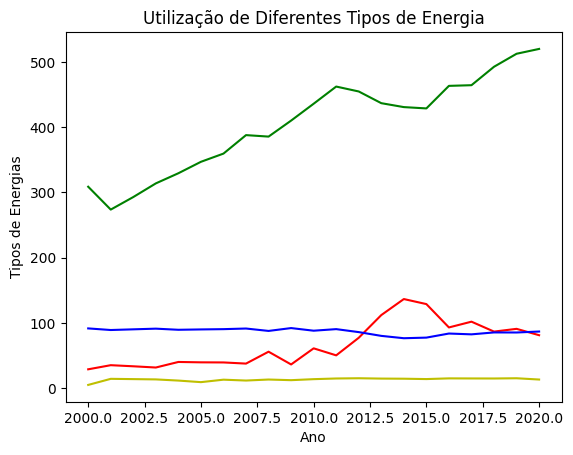

In [ ]:
plt.xlabel("Ano")
plt.ylabel("Tipos de Energias")
plt.title("Utilização de Diferentes Tipos de Energia")
plt.plot(Brazil["Year"], Brazil["EletFossil"], "-r")
plt.plot(Brazil["Year"], Brazil["EletNuclear"], "-y")
plt.plot(Brazil["Year"], Brazil["EletReut"], "-g")
plt.plot(Brazil["Year"], Brazil["EletLowCarbo"], "-b")
plt.show()

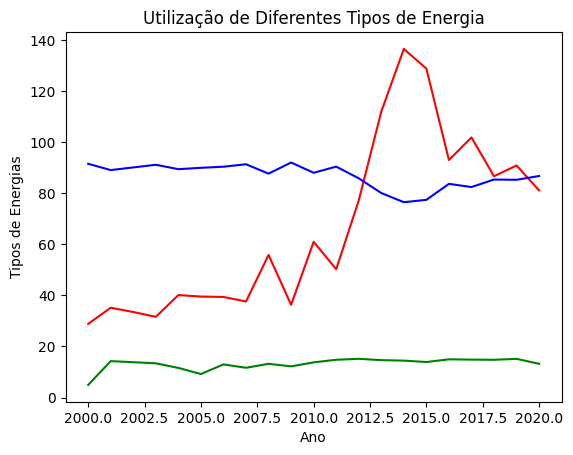

In [ ]:
plt.xlabel("Ano")
plt.ylabel("Tipos de Energias")
plt.title("Utilização de Diferentes Tipos de Energia")
plt.plot(Brazil["Year"], Brazil["EletFossil"], "-r")
plt.plot(Brazil["Year"], Brazil["EletNuclear"], "-g")
plt.plot(Brazil["Year"], Brazil["EletLowCarbo"], "-b")
plt.show()

O gráfico enfatiza propositalmente as energias renováveis, isto porque o Brasil é uma potência em energia renovável como mostrado nos outros exemplos. Contudo, quando retirado a energia renovável do gráfico, percebe-se que a energia fóssil ainda é muito utilizada no país.

**China**

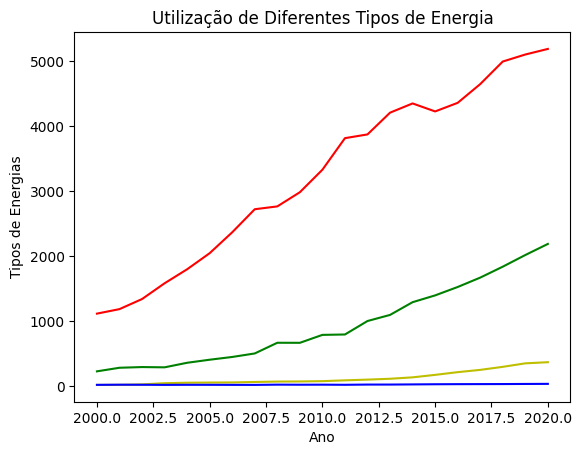

In [ ]:
plt.xlabel("Ano")
plt.ylabel("Tipos de Energias")
plt.title("Utilização de Diferentes Tipos de Energia")
plt.plot(China["Year"], China["EletFossil"], "-r")
plt.plot(China["Year"], China["EletNuclear"], "-y")
plt.plot(China["Year"], China["EletReut"], "-g")
plt.plot(China["Year"], China["EletLowCarbo"], "-b")
plt.show()

O gráfico muito provávelmente demonstra a realidade da China, um país que investe no capital estrangeiro de energia reutilizável e se utiliza em demasiado e energia fóssil. Por mais que retire-se a linha da energia fóssil, o gráfico só categoriza as principais energias utilizadas pela China, sendo a segunda mais utilizada a própria energia reutiizável.

**India**

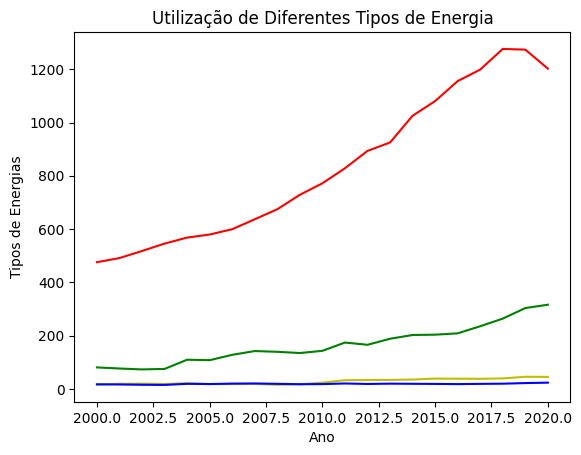

In [ ]:
plt.xlabel("Ano")
plt.ylabel("Tipos de Energias")
plt.title("Utilização de Diferentes Tipos de Energia")
plt.plot(India["Year"], India["EletFossil"], "-r")
plt.plot(India["Year"], India["EletNuclear"], "-y")
plt.plot(India["Year"], India["EletReut"], "-g")
plt.plot(India["Year"], India["EletLowCarbo"], "-b")
plt.show()

Na India a realidade não é muito diferente, por mais que seja um país tão grande quanto a China, ele acaba sendo o quarto país que mais investe em energia renovável, por mais que se tenha um uso razoável de energia renovável ainda se utiliza em demasiado de energia fossil.

##**Análise Energia Primária**##

**Brasil**

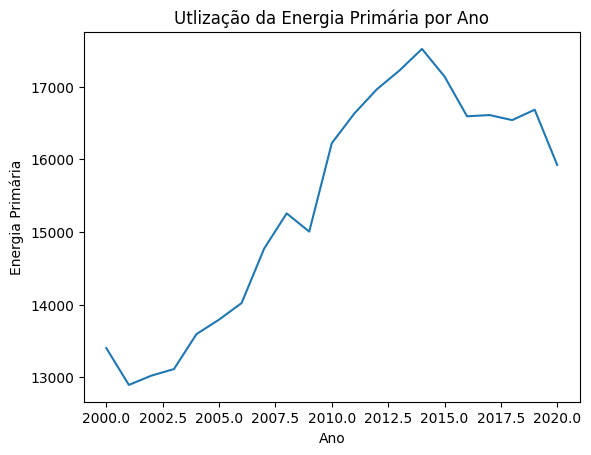

In [ ]:
plt.xlabel("Ano")
plt.ylabel("Energia Primária")
plt.title("Utlização da Energia Primária por Ano")
plt.plot(Brazil["Year"], Brazil["PrimaryEnergyCom"])
plt.show()

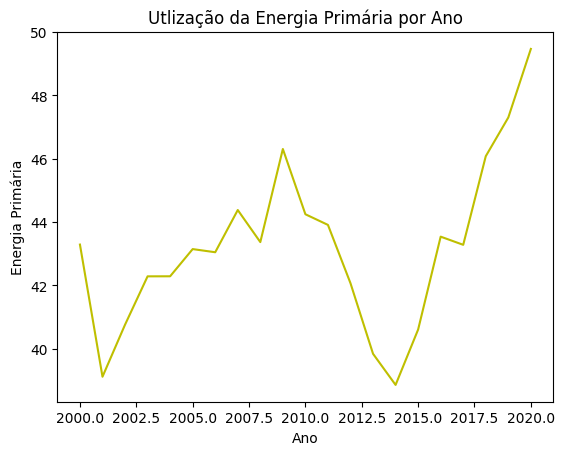

In [ ]:
plt.xlabel("Ano")
plt.ylabel("Energia Primária")
plt.title("Utlização da Energia Primária por Ano")
plt.plot(Brazil["Year"], Brazil["ReutPrimayEnergy"], "-y")
plt.show()

O Brasil se utiliza muito de energias renováveis, mas não é sua fonte principal de energia. Mesmo as hidreletricas serem uma grande fonte de energia, energia elétrica, o petróleo e o carvão mineral ainda disputam como contes principais de energia, provavelmente formando a crescente do gráfico.

**China**

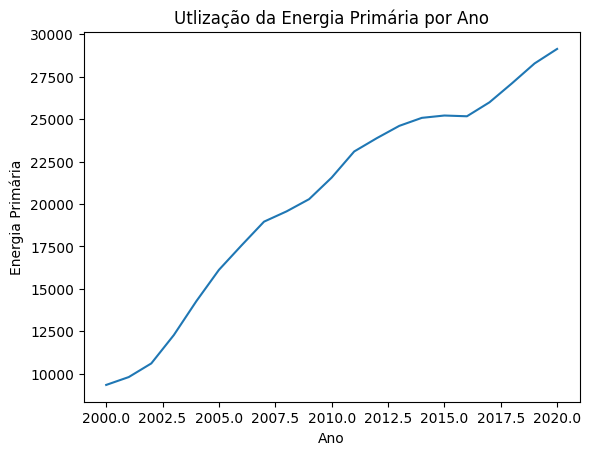

In [ ]:
plt.xlabel("Ano")
plt.ylabel("Energia Primária")
plt.title("Utlização da Energia Primária por Ano")
plt.plot(China["Year"], China["PrimaryEnergyCom"])
plt.show()

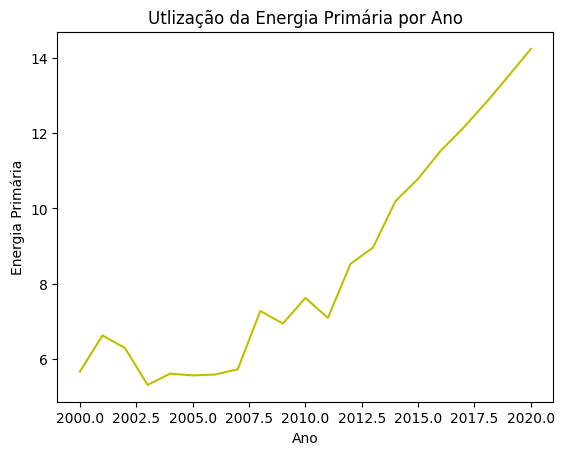

In [ ]:
plt.xlabel("Ano")
plt.ylabel("Energia Primária")
plt.title("Utlização da Energia Primária por Ano")
plt.plot(China["Year"], China["ReutPrimayEnergy"], "-y")
plt.show()

Como visto acima, a China vem uma crescente graças ao seus investimentos internos na energia, sendo a fóssil sua principal.

**India**

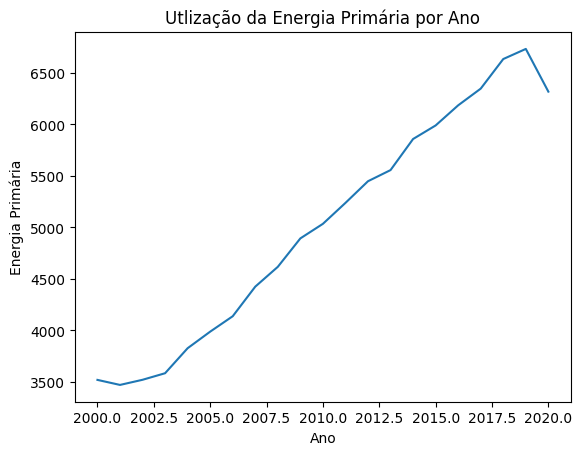

In [ ]:
plt.xlabel("Ano")
plt.ylabel("Energia Primária")
plt.title("Utlização da Energia Primária por Ano")
plt.plot(India["Year"], India["PrimaryEnergyCom"])
plt.show()

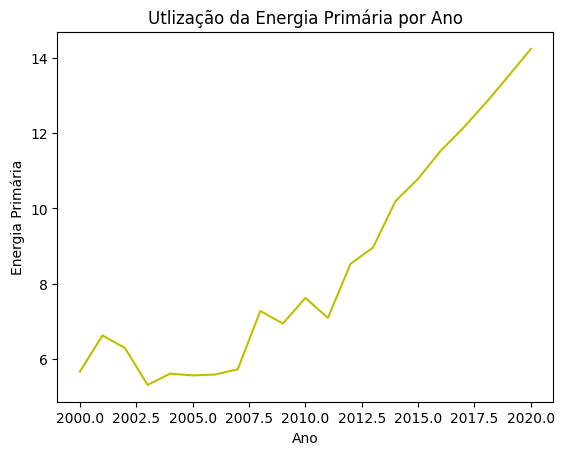

In [ ]:
plt.xlabel("Ano")
plt.ylabel("Energia Primária")
plt.title("Utlização da Energia Primária por Ano")
plt.plot(China["Year"], China["ReutPrimayEnergy"], "-y")
plt.show()

Assim como a China, a India tem vindo em uma grande crescente energetica investindo em energias renováveis, porém ainda focando em energia fóssil.

**Análise GDP**

GDP (Gross Domestic Product), é medida básica do quanto um país produz de bens e serviços em um certo período.

**Brasil**

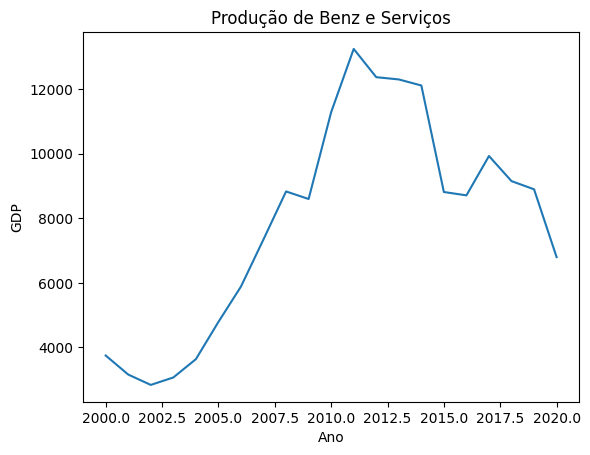

In [ ]:
plt.xlabel("Ano")
plt.ylabel("GDP")
plt.title("Produção de Benz e Serviços")
plt.plot(Brazil["Year"], Brazil["gdp_per_capita"])
plt.show()

Como o mostra o gráfico, o GDP brasileiro sempre esteve em alta até os ultimos anos. Porvávelmente, a recente queda deve-se a grande queda do dolar que acaba influenciando o GDP, mostrando que diferente de outros anos onde o dolar estava em queda, dessa vez atinge de forma grave a produção de insumos nacionais.

**China**

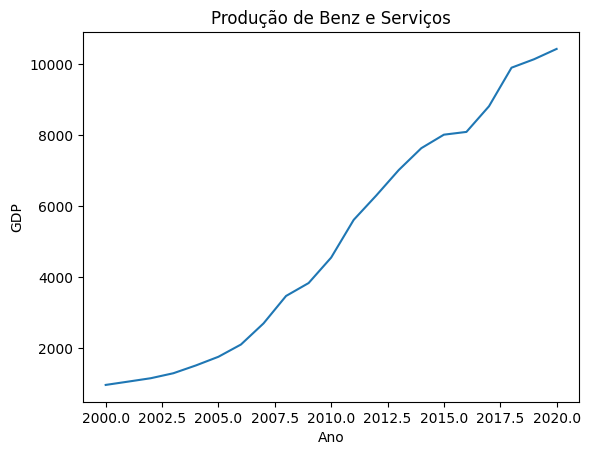

In [ ]:
plt.xlabel("Ano")
plt.ylabel("GDP")
plt.title("Produção de Benz e Serviços")
plt.plot(China["Year"], China["gdp_per_capita"])
plt.show()

A China continua em uma crescente nos ultimos anos, não somente a questão de energia, mas seu PIB como um todo estão em uma grande crescente sem previsão de parada.

##**Teste de Hiposteses e Análise Geral do Dataset**

H0 = O padrão se mantém. HA = O padrão não se mantém. Alpha = 0,05

In [ ]:
analise, valid = train_test_split(energia, test_size = 0.3, random_state=17)
amostra1 = analise["AcessElet"].sample(frac=0.3)
amostra2 = analise["AcessElet"].sample(frac=0.3)
amostra3 = analise["AcessElet"].sample(frac=0.3)

In [ ]:
print(np.std(amostra1))
print(np.std(amostra2))
print(np.std(amostra3))

30.372500126693676
30.160707296776824
28.26194440146278


In [ ]:
stat1, p1 = shapiro(amostra1)
stat2, p2 = shapiro(amostra2)
stat3, p3 = shapiro(amostra3)

if p1 > 0.05:
  print("P1 é normal\n")
else:
  print("P1 NÃO é normal\n")

if p2 > 0.05:
  print("P2 é normal\n")
else:
  print("P2 NÃO é normal\n")

if p3 > 0.05:
  print("P3 é normal\n")
else:
  print("P3 NÃO é normal\n")

print("stat1=%.3f, p1=%.3f, stat2=%.3f, p2=%.3f, stat3=%.3f, p3=%.3f" % (stat1, p1, stat2, p2, stat3, p3))

P1 é normal

P2 é normal

P3 é normal

stat1=nan, p1=1.000, stat2=nan, p2=1.000, stat3=nan, p3=1.000


In [ ]:
static1, p_value1 = stats.ks_2samp(amostra1, amostra2)
static2, p_value2 = stats.ks_2samp(amostra2, amostra3)
static3, p_value3 = stats.ks_2samp(amostra1, amostra3)
static4, p_value4 = stats.ks_2samp(amostra1, valid['AcessElet'])
static5, p_value5 = stats.ks_2samp(amostra2, valid['AcessElet'])
static5, p_value6 = stats.ks_2samp(amostra3, valid['AcessElet'])

if(p_value1 > 0.05):
    print("Amostra 1 e amostra 2 tem a mesma distribuição.")
else:
    print("Amostra 1 e amostra 2 NÃO tem a mesma distribuição.")

if(p_value2 > 0.05):
    print("Amostra 2 e amostra 3 tem a mesma distribuição.")
else:
    print("Amostra 2 e amostra 3 NÃO tem a mesma distribuição.")

if(p_value3 > 0.05):
    print("Amostra 1 e amostra 2 tem a mesma distribuição.")
else:
    print("Amostra 1 e amostra 2 NÃO tem a mesma distribuição.")

if(p_value4 > 0.05):
    print("Amostra 1 e amostra de validação tem a mesma distribuição.")
else:
    print("Amostra 1 e amostra de validação NÃO tem a mesma distribuição.")

if(p_value5 > 0.05):
    print("Amostra 2 e amostra de validação tem a mesma distribuição.")
else:
    print("Amostra 2 e amostra de validação NÃO tem a mesma distribuição.")

if(p_value6 > 0.05):
    print("Amostra 3 e amostra de validação tem a mesma distribuição.")
else:
    print("Amostra 3 e amostra de validação NÃO tem a mesma distribuição.")

Amostra 1 e amostra 2 tem a mesma distribuição.
Amostra 2 e amostra 3 tem a mesma distribuição.
Amostra 1 e amostra 2 tem a mesma distribuição.
Amostra 1 e amostra de validação tem a mesma distribuição.
Amostra 2 e amostra de validação tem a mesma distribuição.
Amostra 3 e amostra de validação tem a mesma distribuição.


<Axes: ylabel='Density'>

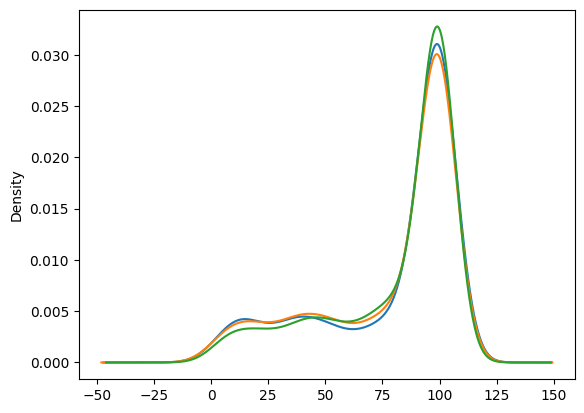

In [ ]:
amostra1.plot(kind='density')
amostra2.plot(kind='density')
amostra3.plot(kind='density')

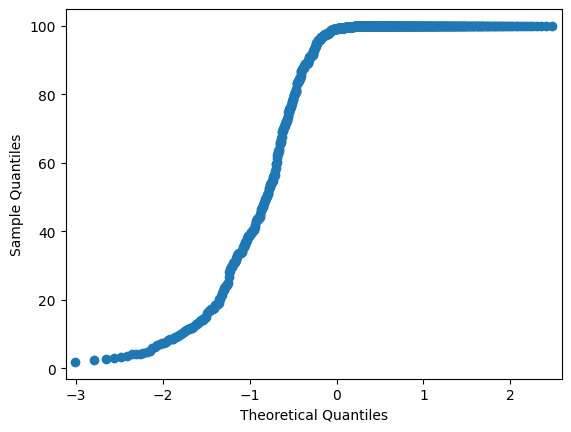

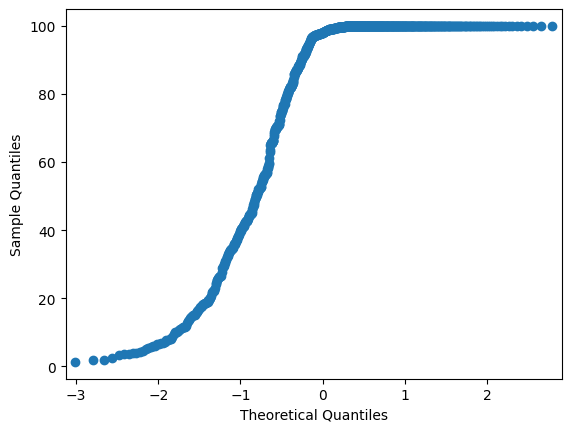

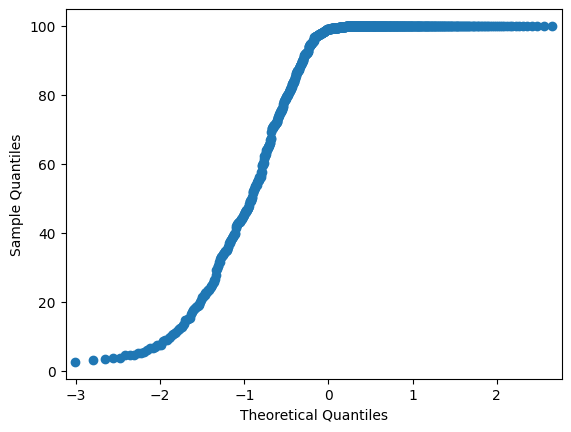

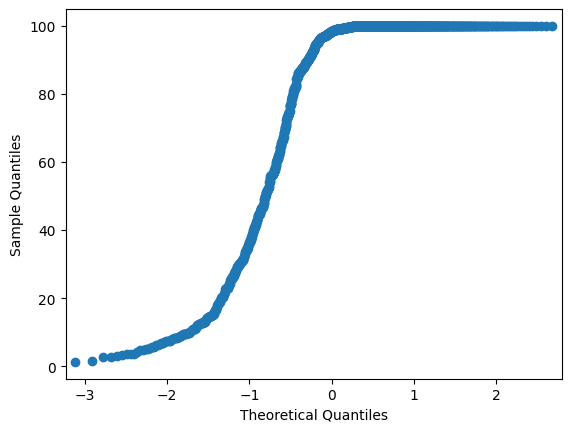

In [ ]:
qqplot_data1 = qqplot(amostra1, line ='s').gca().lines
qqplot_data2 = qqplot(amostra2, line ='s').gca().lines
qqplot_data3 = qqplot(amostra3, line ='s').gca().lines
qqplot_data4 = qqplot(valid["AcessElet"], line ='s').gca().lines

**Conclusão**

Ao comprovar que os dados dos três países respeitam a normal, comprova-se que os dados distribuidos e apresentados durante esta análise tem uma grande chance de serem válidos e, consequentemente, que as análises estão próximas de estarem corretas.